In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [46]:
df = pd.read_csv('synthetic_student_stress.csv')
df.head()

,Your Academic Stage,Peer pressure,Academic pressure from your home,Study Environment,What coping strategy you use as a student?,"Do you have any bad habits like smoking, drinking on a daily basis?",What would you rate the academic competition in your student life,Rate your academic stress index
0,undergraduate,1.0,3,Peaceful,Emotional breakdown (crying a lot),prefer not to say,NaN,4.0
1,high school,4.0,4,Noisy,Emotional breakdown (crying a lot),prefer not to say,5.0,5.0
2,high school,5.0,5,Peaceful,"Social support (friends, family)",No,3.0,3.0
3,high school,1.0,1,Noisy,Emotional breakdown (crying a lot),prefer not to say,4.0,3.0
4,post-graduate,3.0,1,Noisy,Analyze the situation and handle it with intel...,prefer not to say,1.0,2.0


In [47]:
# RENAME COLUMNS
df.rename(columns = {"Your Academic Stage":"acadmic_stage",
                     "What coping strategy you use as a student?":"strategy_used",
                     "Do you have any bad habits like smoking, drinking on a daily basis?":"bad_habbits",
                    "What would you rate the academic  competition in your student life":"academic_competation",
                     "Rate your academic stress index ":"stress_level"
                    },inplace = True)

df

,acadmic_stage,Peer pressure,Academic pressure from your home,Study Environment,strategy_used,bad_habbits,academic_competation,stress_level
0,undergraduate,1.0,3,Peaceful,Emotional breakdown (crying a lot),prefer not to say,NaN,4.0
1,high school,4.0,4,Noisy,Emotional breakdown (crying a lot),prefer not to say,5.0,5.0
2,high school,5.0,5,Peaceful,"Social support (friends, family)",No,3.0,3.0
3,high school,1.0,1,Noisy,Emotional breakdown (crying a lot),prefer not to say,4.0,3.0
4,post-graduate,3.0,1,Noisy,Analyze the situation and handle it with intel...,prefer not to say,1.0,2.0
...,...,...,...,...,...,...,...,...
995,undergraduate,3.0,4,Noisy,Emotional breakdown (crying a lot),No,4.0,5.0
996,high school,3.0,5,Peaceful,Emotional breakdown (crying a lot),Yes,5.0,5.0
997,high school,2.0,1,disrupted,"Social support (friends, family)",Yes,2.0,2.0
998,undergraduate,3.0,3,Peaceful,Analyze the situation and handle it with intel...,Yes,1.0,2.0


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   acadmic_stage                     1000 non-null   object 
 1   Peer pressure                     999 non-null    float64
 2   Academic pressure from your home  1000 non-null   int64  
 3   Study Environment                 999 non-null    object 
 4   strategy_used                     1000 non-null   object 
 5   bad_habbits                       999 non-null    object 
 6   academic_competation              999 non-null    float64
 7   stress_level                      999 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 62.6+ KB


# CLEANING DATA(REMOVING NULL & DUPLICATES)

In [49]:
df.isnull().sum()

acadmic_stage                       0
Peer pressure                       1
Academic pressure from your home    0
Study Environment                   1
strategy_used                       0
bad_habbits                         1
academic_competation                1
stress_level                        1
dtype: int64

In [50]:
# Here we simply fill missing numeric values with the median and categorical with mode if needed

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna(df[col].mode()[0])
df.isnull().sum()

acadmic_stage                       0
Peer pressure                       0
Academic pressure from your home    0
Study Environment                   0
strategy_used                       0
bad_habbits                         0
academic_competation                0
stress_level                        0
dtype: int64

In [51]:
# Checking Number of Duplicated Values in the Dataset
print("Duplicated Values in the Dataset are",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates removed successfully!")
print("Remaining duplicate rows:", df.duplicated().sum())

Duplicated Values in the Dataset are 49
Duplicates removed successfully!
Remaining duplicate rows: 0


In [52]:
df.to_csv('cleaned.csv', index=False)
print("CSV file saved!")


CSV file saved!


# LETS UNDERSTAND ABOUT DATASET

In [53]:
#Shape of the dataset
print(f"Shape of dataset: ")
df.shape

Shape of dataset: 


(951, 8)

In [54]:
#Columns and data types
print("Columns and their data types:")
df.dtypes


Columns and their data types:


acadmic_stage                        object
Peer pressure                       float64
Academic pressure from your home      int64
Study Environment                    object
strategy_used                        object
bad_habbits                          object
academic_competation                float64
stress_level                        float64
dtype: object

In [55]:
#General info
print("Information about the dataset:")
df.info()


Information about the dataset:
<class 'pandas.core.frame.DataFrame'>
Index: 951 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   acadmic_stage                     951 non-null    object 
 1   Peer pressure                     951 non-null    float64
 2   Academic pressure from your home  951 non-null    int64  
 3   Study Environment                 951 non-null    object 
 4   strategy_used                     951 non-null    object 
 5   bad_habbits                       951 non-null    object 
 6   academic_competation              951 non-null    float64
 7   stress_level                      951 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 66.9+ KB


In [56]:
#Description of numerical columns
print("Statistical summary of numerical columns:")
df.describe()


Statistical summary of numerical columns:


,Peer pressure,Academic pressure from your home,academic_competation,stress_level
count,951.000000,951.000000,951.000000,951.000000
mean,3.053628,2.983176,2.985279,3.303891
std,1.420254,1.414858,1.403677,1.088299
min,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.000000
75%,4.000000,4.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


In [57]:
#Description of categorical columns
print("Statistical summary of categorical columns:")
df.describe(include=['object'])


Statistical summary of categorical columns:


,acadmic_stage,Study Environment,strategy_used,bad_habbits
count,951,951,951,951
unique,3,3,3,3
top,post-graduate,disrupted,Analyze the situation and handle it with intel...,prefer not to say
freq,322,337,323,336


In [58]:
#Check range for numerics column:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
summary = pd.DataFrame({
    'Column': numeric_cols,
    'Min': [df[col].min() for col in numeric_cols],
    'Max': [df[col].max() for col in numeric_cols],
    'Unique values': [df[col].unique() for col in numeric_cols]
})

summary


,Column,Min,Max,Unique values
0,Peer pressure,1.0,5.0,"[1.0, 4.0, 5.0, 3.0, 2.0]"
1,Academic pressure from your home,1.0,5.0,"[3, 4, 5, 1, 2]"
2,academic_competation,1.0,5.0,"[3.0, 5.0, 4.0, 1.0, 2.0]"
3,stress_level,1.0,5.0,"[4.0, 5.0, 3.0, 2.0, 1.0]"


In [59]:
#Check for numerics column:
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print(f"Column: {col}")
    print(f"  Unique values: {df[col].unique()}\n")


Column: acadmic_stage
  Unique values: ['undergraduate' 'high school' 'post-graduate']

Column: Study Environment
  Unique values: ['Peaceful' 'Noisy' 'disrupted']

Column: strategy_used
  Unique values: ['Emotional breakdown (crying a lot)' 'Social support (friends, family)'
 'Analyze the situation and handle it with intellect']

Column: bad_habbits
  Unique values: ['prefer not to say' 'No' 'Yes']



In [60]:
#Numerical and categorical column lists
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.to_list()
categorical_cols = df.select_dtypes(include='object').columns.to_list()

print(f"Numerical columns: {numeric_cols}")
print(f"Categorical columns: {categorical_cols}")


Numerical columns: ['Peer pressure', 'Academic pressure from your home', 'academic_competation', 'stress_level']
Categorical columns: ['acadmic_stage', 'Study Environment', 'strategy_used', 'bad_habbits']


In [61]:
# LETS UNDERSTAND THE DISTRIBUTION OF VALUES IN EACH FEATURE
for col in df.columns:
    print("\n"+"="*100+"\n")
    print(f"categores and values distribution for {df[col].value_counts()}")



categores and values distribution for acadmic_stage
post-graduate    322
high school      319
undergraduate    310
Name: count, dtype: int64


categores and values distribution for Peer pressure
4.0    201
5.0    198
3.0    196
1.0    190
2.0    166
Name: count, dtype: int64


categores and values distribution for Academic pressure from your home
3    204
1    199
4    186
5    186
2    176
Name: count, dtype: int64


categores and values distribution for Study Environment
disrupted    337
Peaceful     315
Noisy        299
Name: count, dtype: int64


categores and values distribution for strategy_used
Analyze the situation and handle it with intellect    323
Social support (friends, family)                      316
Emotional breakdown (crying a lot)                    312
Name: count, dtype: int64


categores and values distribution for bad_habbits
prefer not to say    336
No                   318
Yes                  297
Name: count, dtype: int64


categores and values distribution 

# VISUALIZING DATASET(USING BARPLOT, PIECHART ETC)

number of students in each level of stress
    stress_level  count
0           4.0    313
1           3.0    266
2           2.0    196
3           5.0    131
4           1.0     45


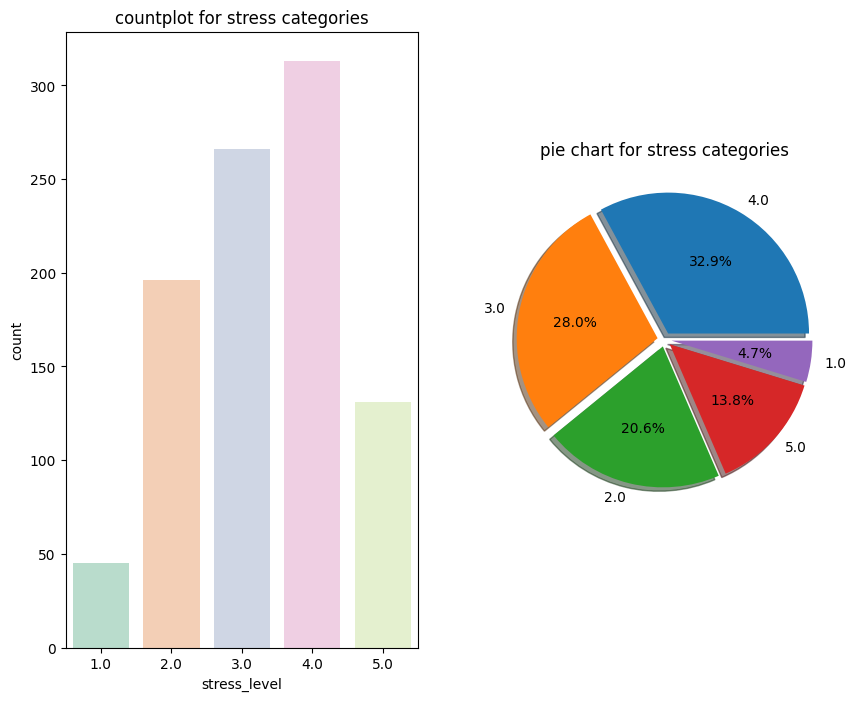

In [62]:
# LETS ANALYIES THE STRESS COUNT STUDENTS
print(f"number of students in each level of stress\n {df['stress_level'].value_counts().reset_index()}")
fig ,ax = plt.subplots(1,2,figsize = (10,8))

sns.countplot(x = "stress_level",data = df ,palette = "Pastel2",ax = ax[0])
ax[1].pie(df["stress_level"].value_counts(),labels = df["stress_level"].value_counts().index,autopct='%1.1f%%', explode=[0.05]*5, shadow=True)

ax[0].set_title("countplot for stress categories")
ax[1].set_title("pie chart for stress categories")


plt.show()

Number of students in acadmic_stage as per stress level
stress_level  acadmic_stage
1.0           post-graduate     16
              high school       15
              undergraduate     14
2.0           undergraduate     70
              high school       63
              post-graduate     63
3.0           post-graduate     91
              undergraduate     89
              high school       86
4.0           high school      112
              post-graduate    102
              undergraduate     99
5.0           post-graduate     50
              high school       43
              undergraduate     38
Name: count, dtype: int64


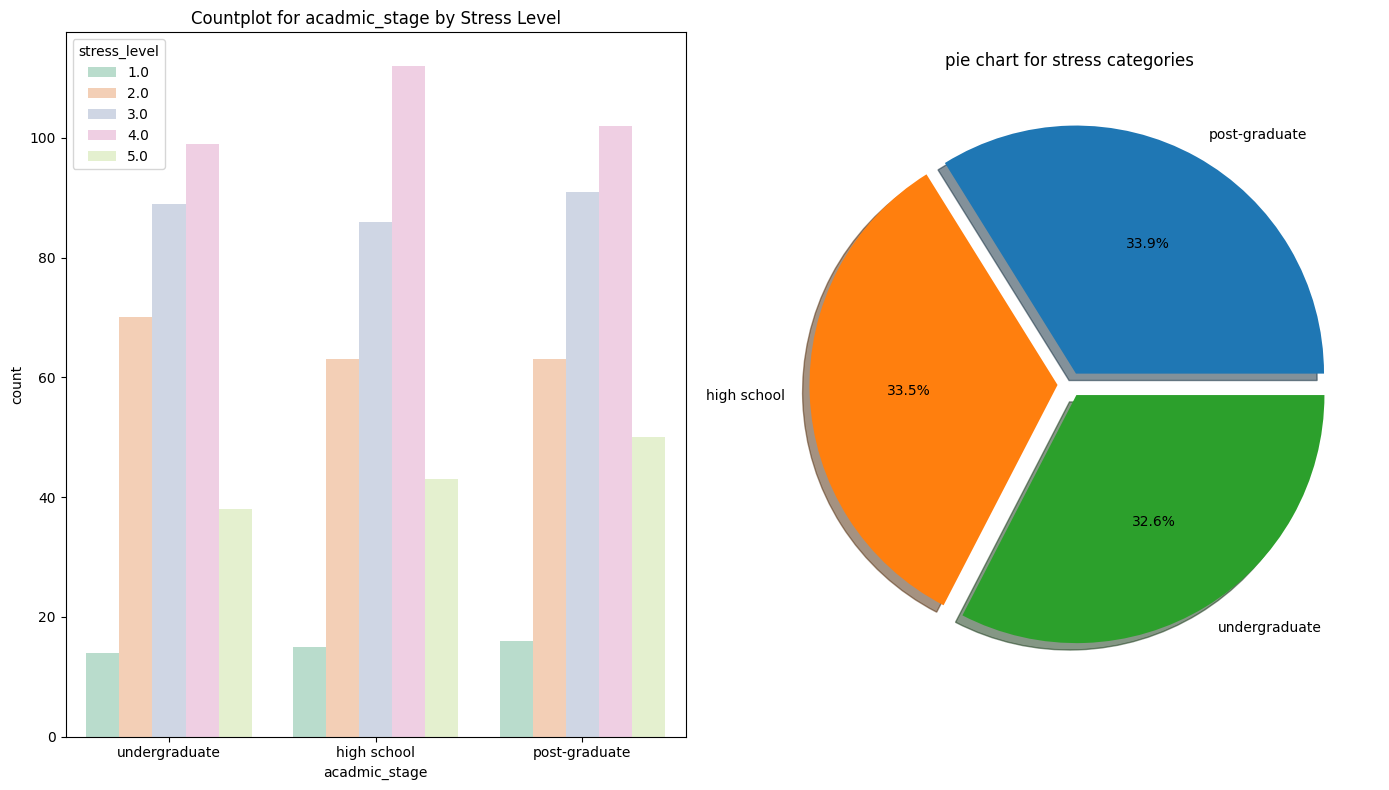

Number of students in Peer pressure as per stress level
stress_level  Peer pressure
1.0           1.0              28
              2.0               9
              3.0               6
              5.0               2
2.0           1.0              56
              2.0              48
              3.0              46
              4.0              27
              5.0              19
3.0           3.0              56
              4.0              55
              2.0              54
              1.0              52
              5.0              49
4.0           4.0              84
              5.0              69
              3.0              67
              2.0              48
              1.0              45
5.0           5.0              59
              4.0              35
              3.0              21
              1.0               9
              2.0               7
Name: count, dtype: int64


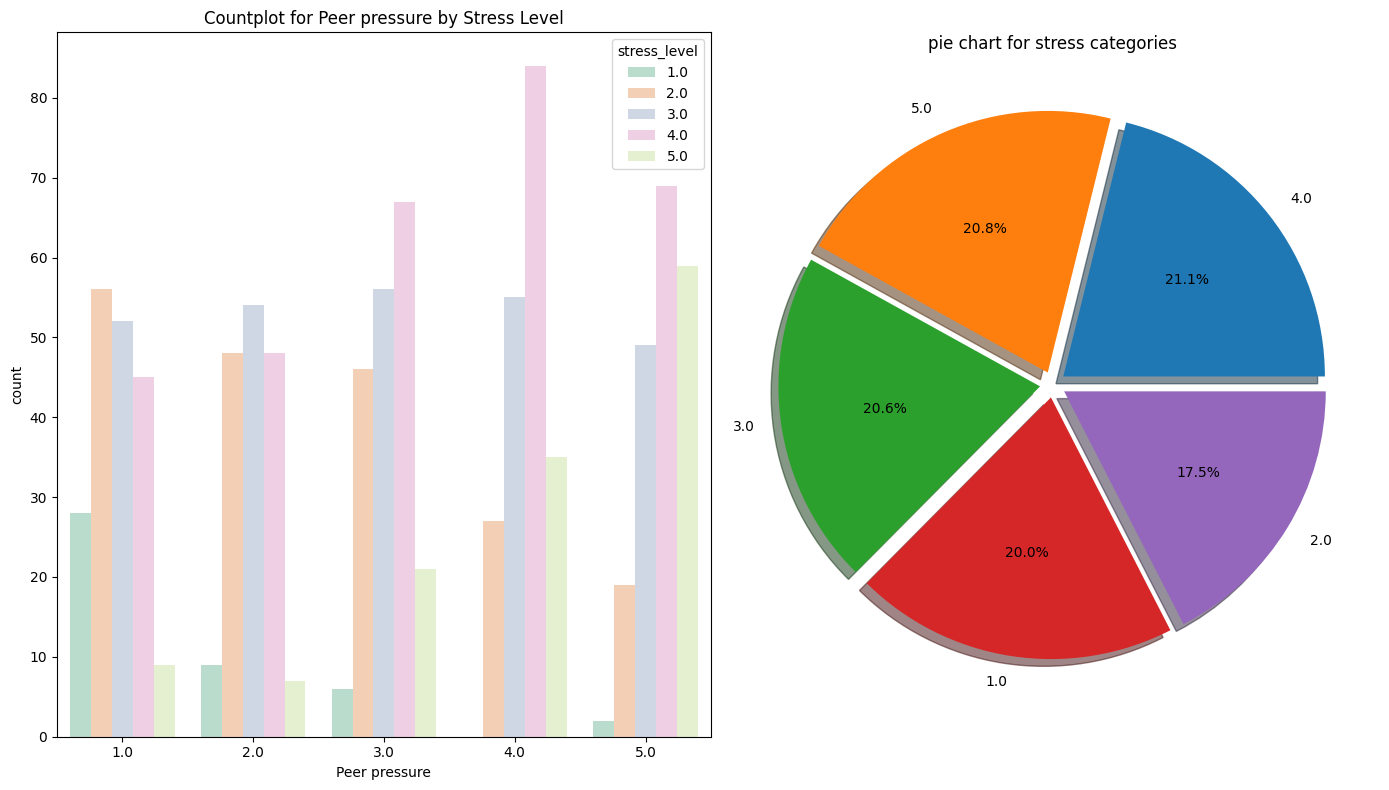

Number of students in Academic pressure from your home as per stress level
stress_level  Academic pressure from your home
1.0           1                                   27
              2                                   12
              3                                    4
              4                                    1
              5                                    1
2.0           1                                   69
              2                                   51
              3                                   41
              4                                   21
              5                                   14
3.0           4                                   59
              1                                   56
              2                                   54
              3                                   53
              5                                   44
4.0           3                                   85
              5               

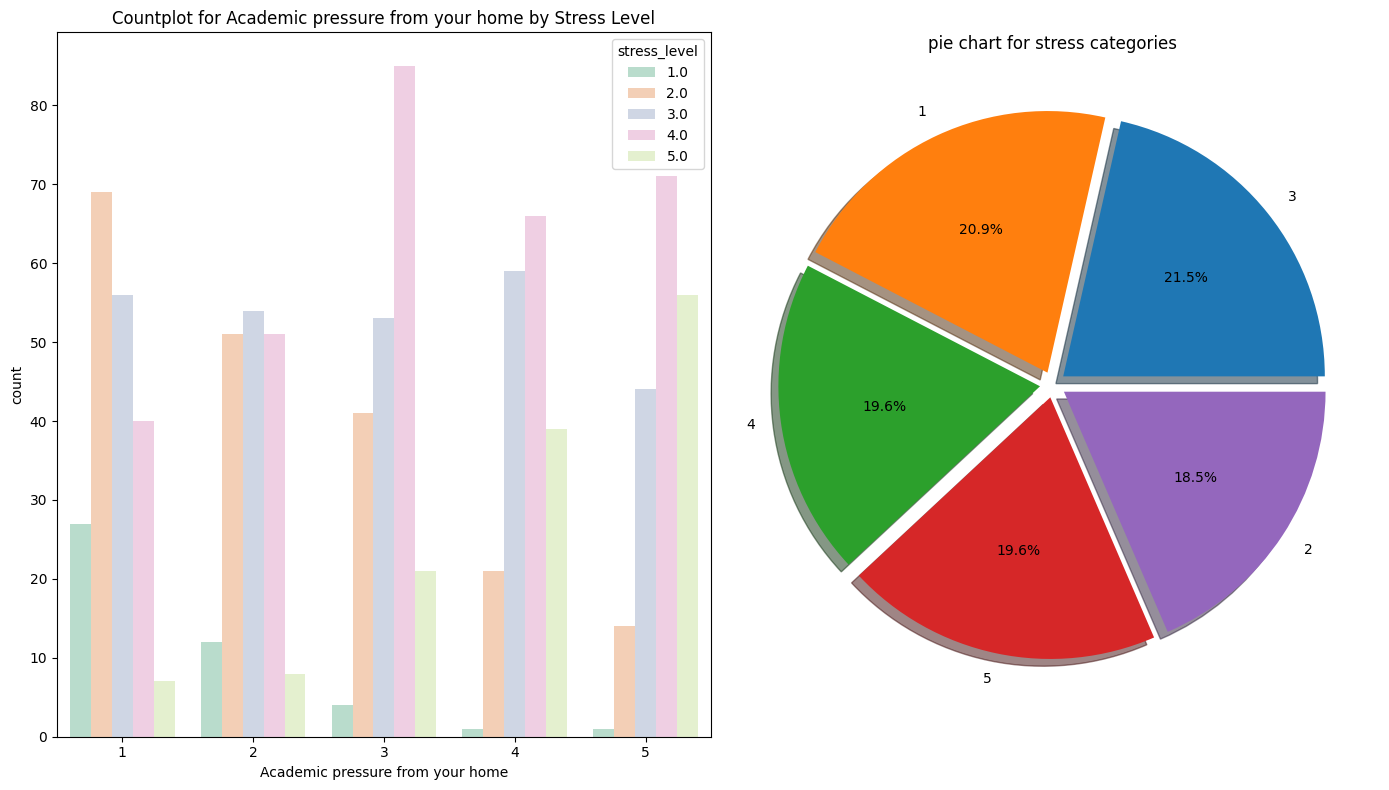

Number of students in Study Environment as per stress level
stress_level  Study Environment
1.0           Peaceful              32
              Noisy                 10
              disrupted              3
2.0           Peaceful             104
              Noisy                 55
              disrupted             37
3.0           Noisy                 91
              Peaceful              89
              disrupted             86
4.0           disrupted            136
              Noisy                105
              Peaceful              72
5.0           disrupted             75
              Noisy                 38
              Peaceful              18
Name: count, dtype: int64


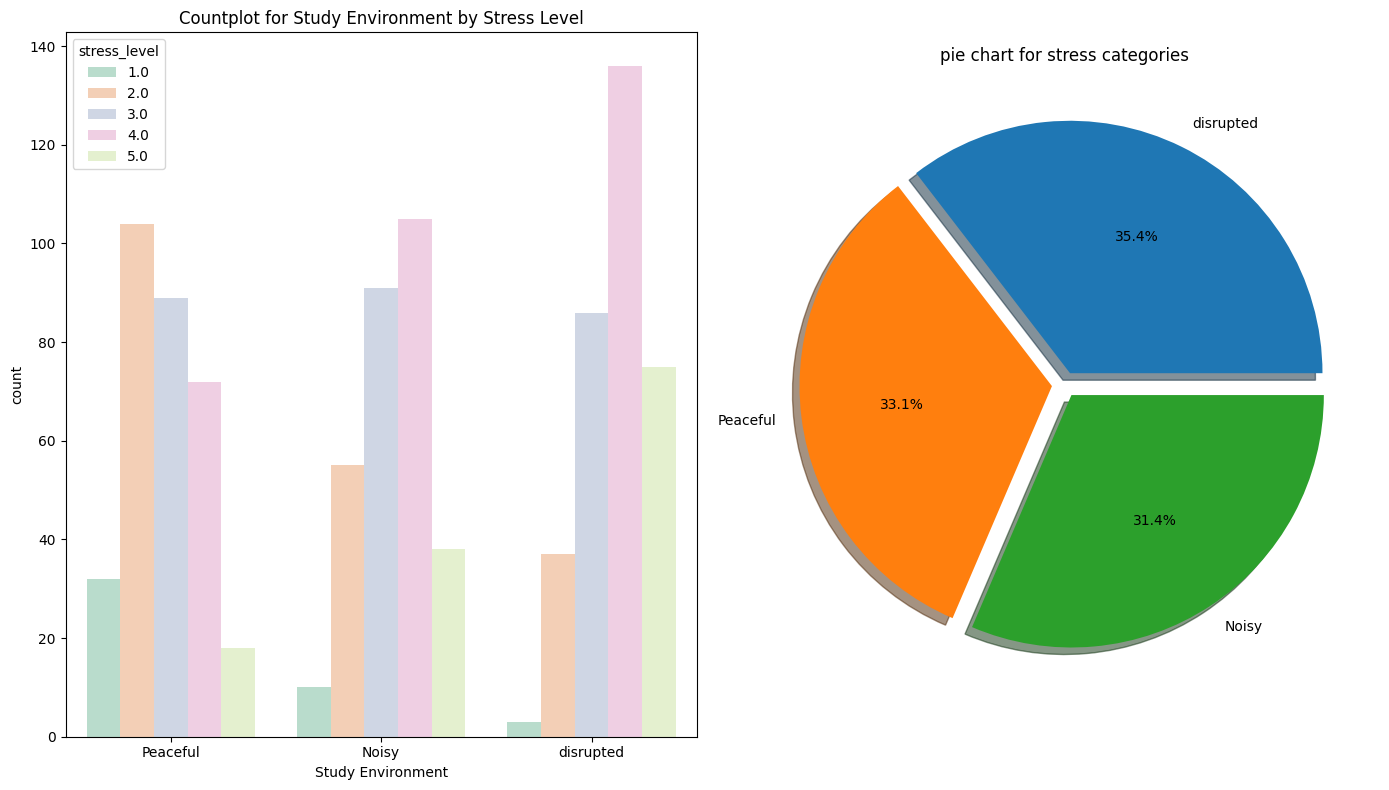

Number of students in strategy_used as per stress level
stress_level  strategy_used                                     
1.0           Social support (friends, family)                       34
              Analyze the situation and handle it with intellect     11
2.0           Social support (friends, family)                      102
              Analyze the situation and handle it with intellect     81
              Emotional breakdown (crying a lot)                     13
3.0           Social support (friends, family)                      113
              Analyze the situation and handle it with intellect    102
              Emotional breakdown (crying a lot)                     51
4.0           Emotional breakdown (crying a lot)                    136
              Analyze the situation and handle it with intellect    115
              Social support (friends, family)                       62
5.0           Emotional breakdown (crying a lot)                    112
              A

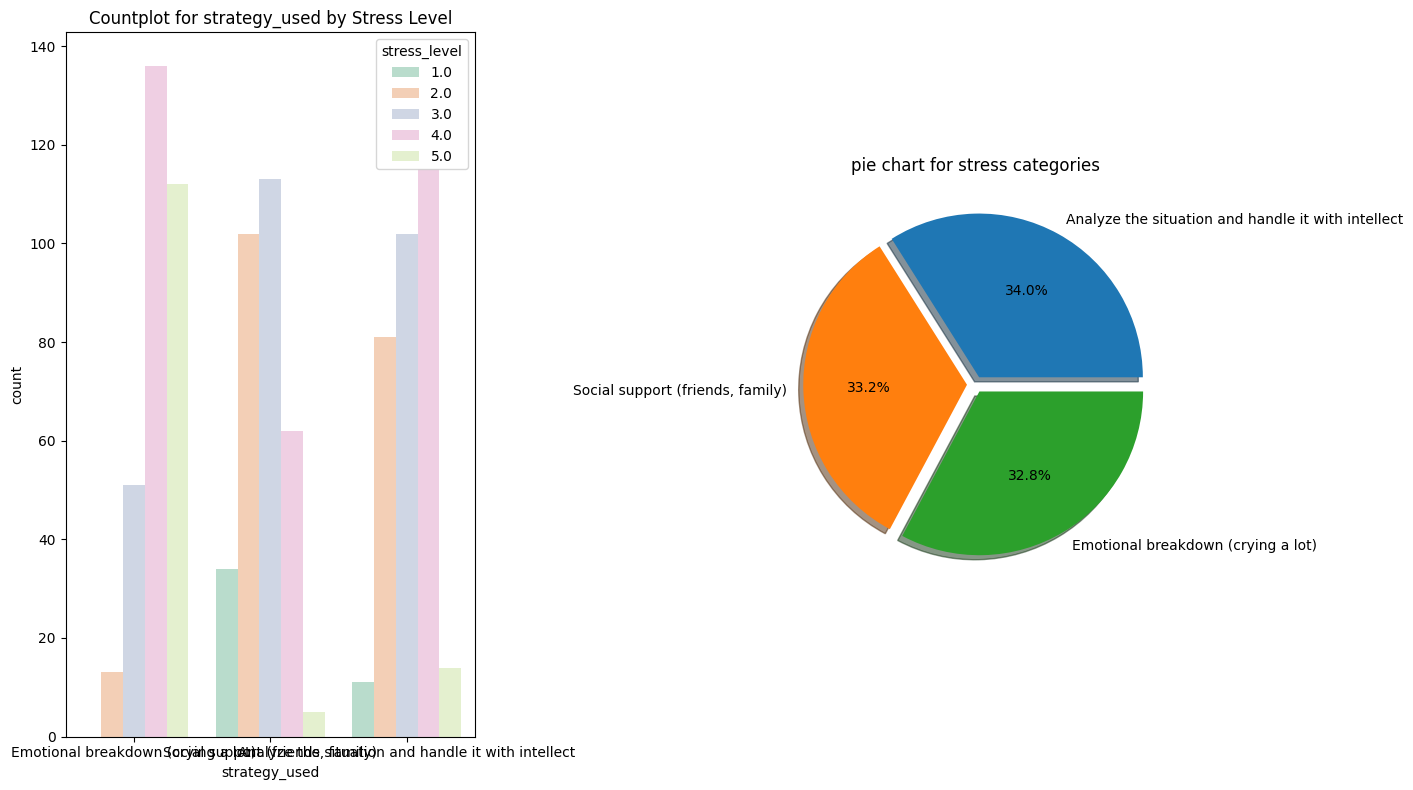

Number of students in bad_habbits as per stress level
stress_level  bad_habbits      
1.0           No                    18
              prefer not to say     17
              Yes                   10
2.0           prefer not to say     86
              No                    69
              Yes                   41
3.0           No                   100
              prefer not to say     97
              Yes                   69
4.0           Yes                  120
              prefer not to say    103
              No                    90
5.0           Yes                   57
              No                    41
              prefer not to say     33
Name: count, dtype: int64


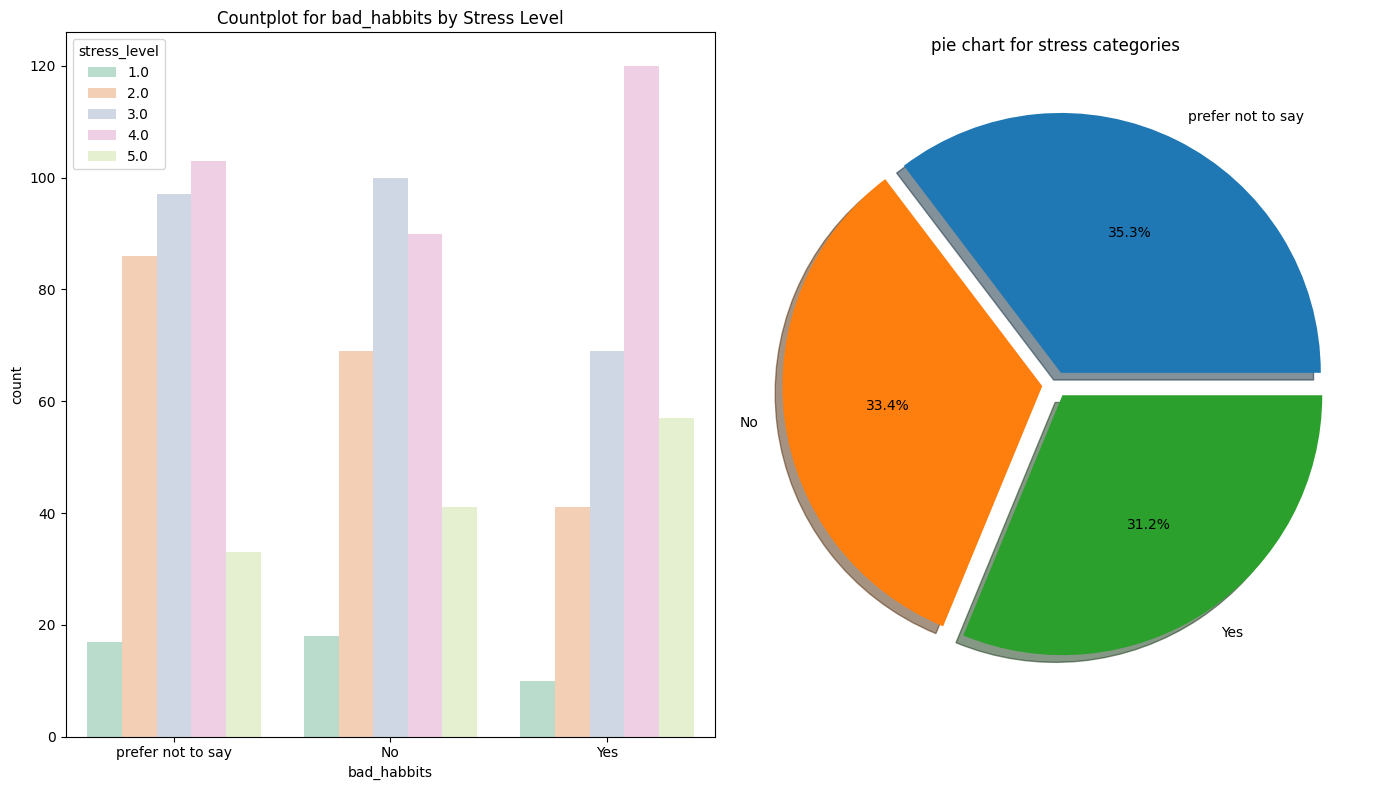

Number of students in academic_competation as per stress level
stress_level  academic_competation
1.0           1.0                     20
              2.0                     18
              3.0                      5
              4.0                      2
2.0           1.0                     72
              2.0                     45
              3.0                     44
              4.0                     23
              5.0                     12
3.0           2.0                     64
              3.0                     58
              1.0                     56
              4.0                     48
              5.0                     40
4.0           4.0                     80
              5.0                     79
              3.0                     76
              2.0                     42
              1.0                     36
5.0           5.0                     52
              4.0                     35
              3.0                     21


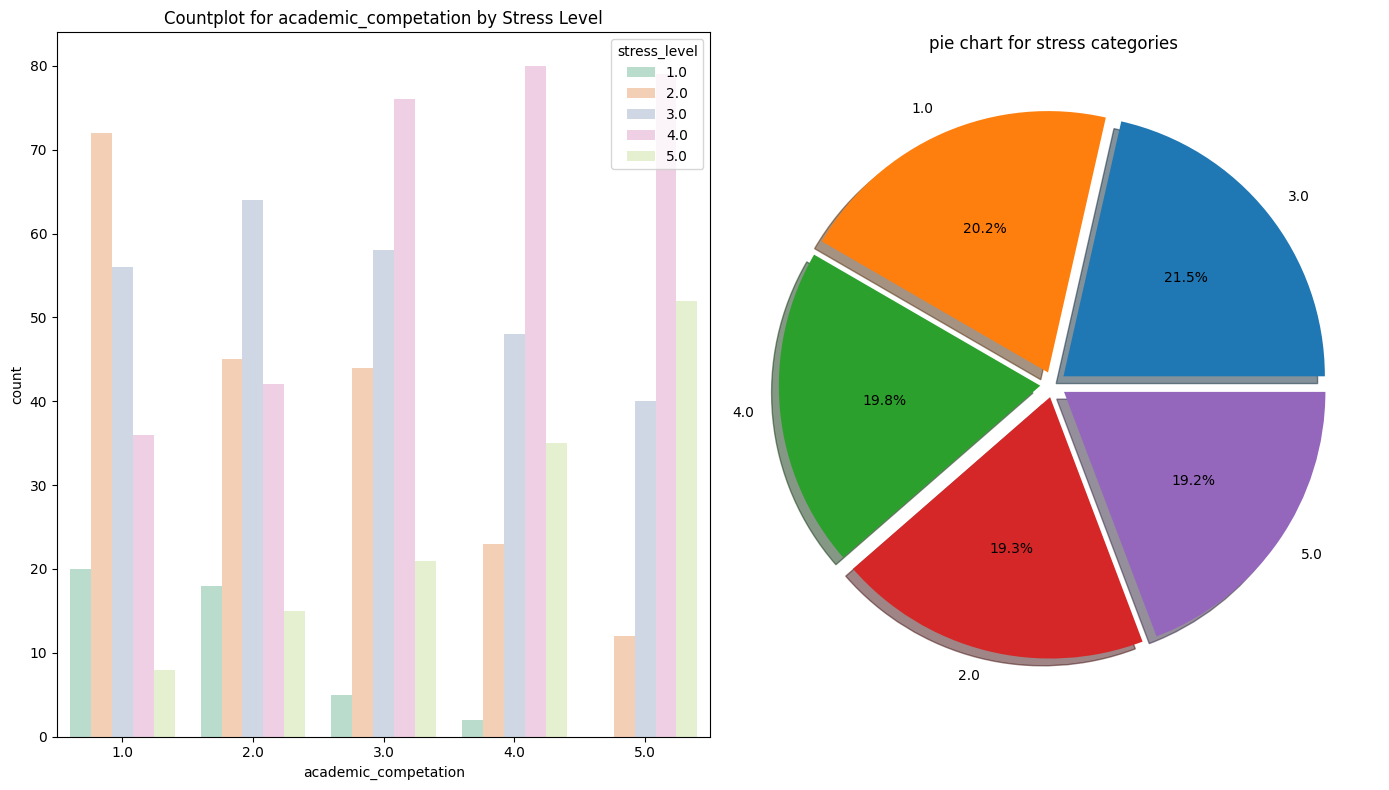

In [63]:
# Visualization for each category with respect to stress level
# df = df.drop(columns=["Timestamp"])
for col in df.columns.drop('stress_level'):
    print(f"Number of students in {col} as per stress level\n{df.groupby('stress_level')[col].value_counts()}")
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 8))
    
    # Countplot with hue for stress level
    sns.countplot(x=col, hue="stress_level", data=df, palette="Pastel2", ax=axes[0])
    axes[0].set_title(f"Countplot for {col} by Stress Level")
    
    # # Pie chart: distribution per stress level
    # stress_categories = df['stress_level'].unique()
    # pie_data = []
    # labels = []
    
    # for stress in stress_categories:
    #     counts = df[df['stress_level'] == stress][col].value_counts()
    #     pie_data.extend(counts.values)
    #     labels.extend([f"{val} ({stress})" for val in counts.index])
    
    # axes[1].pie(pie_data, labels=labels, autopct='%1.1f%%', explode=[0.05]*len(pie_data), shadow=True)
    # axes[1].set_title(f"Pie chart of {col} by Stress Level")
    axes[1].pie(df[col].value_counts(),labels = df[col].value_counts().index,autopct='%1.1f%%', explode=[0.05]*len(df[col].value_counts()), shadow=True)
    axes[1].set_title("pie chart for stress categories")
    plt.tight_layout()
    plt.show()


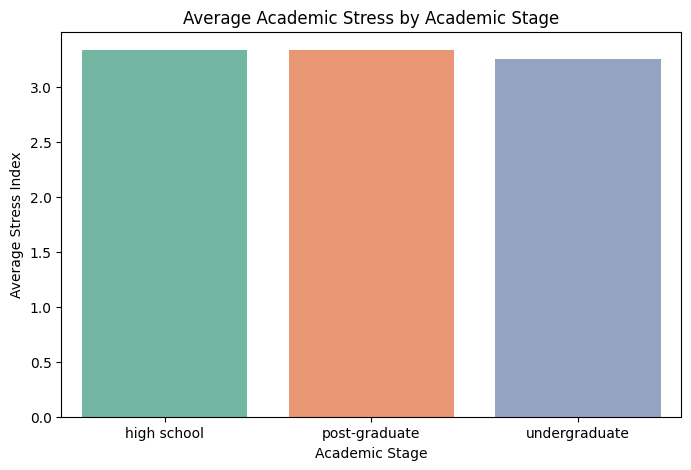

In [64]:
#Group by Academic Stage and compute average stress index
avg_stress_stage = df.groupby('acadmic_stage')['stress_level'].mean().reset_index()


# Bar plot by Academic Stage
plt.figure(figsize=(8,5))
sns.barplot(x='acadmic_stage', y='stress_level', data=avg_stress_stage, palette='Set2')
plt.title('Average Academic Stress by Academic Stage')
plt.ylabel('Average Stress Index')
plt.xlabel('Academic Stage')
plt.show()

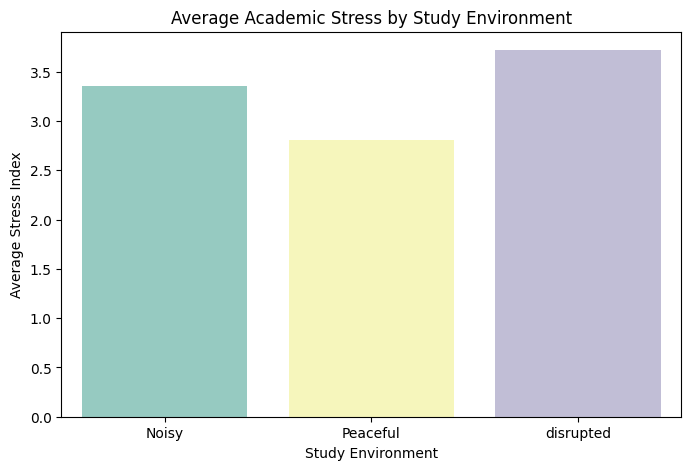

In [65]:
# Group by Study Environment and compute average stress index
avg_stress_env = df.groupby('Study Environment')['stress_level'].mean().reset_index()
avg_stress_env

# Bar plot by Study Environment
plt.figure(figsize=(8,5))
sns.barplot(x='Study Environment', y='stress_level', data=avg_stress_env, palette='Set3')
plt.title('Average Academic Stress by Study Environment')
plt.ylabel('Average Stress Index')
plt.xlabel('Study Environment')
plt.show()

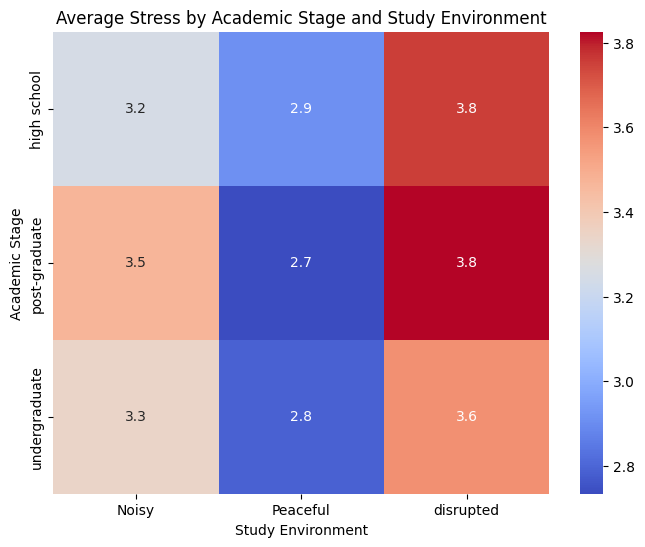

In [66]:

# Heatmap to combine Academic Stage and Study Environment
pivot_table = df.pivot_table(values='stress_level', index='acadmic_stage', columns='Study Environment', aggfunc='mean')

plt.figure(figsize=(8,6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title('Average Stress by Academic Stage and Study Environment')
plt.ylabel('Academic Stage')
plt.xlabel('Study Environment')
plt.show()



# OUTLIER DETECTION(NUMERICS)

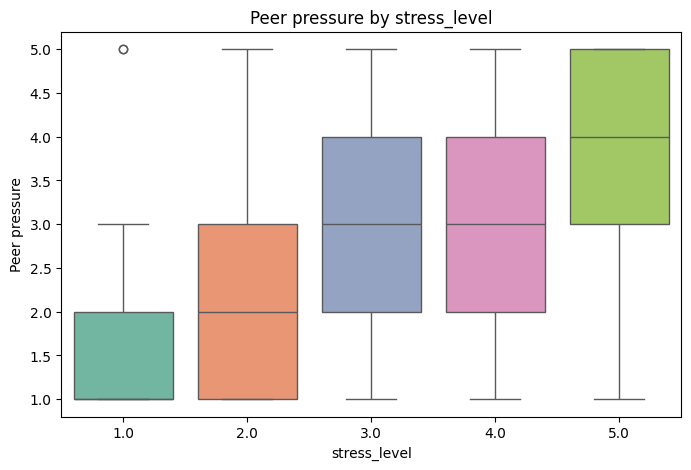

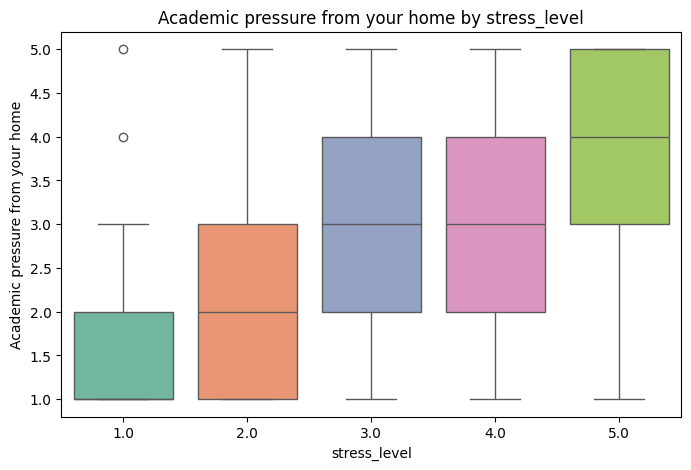

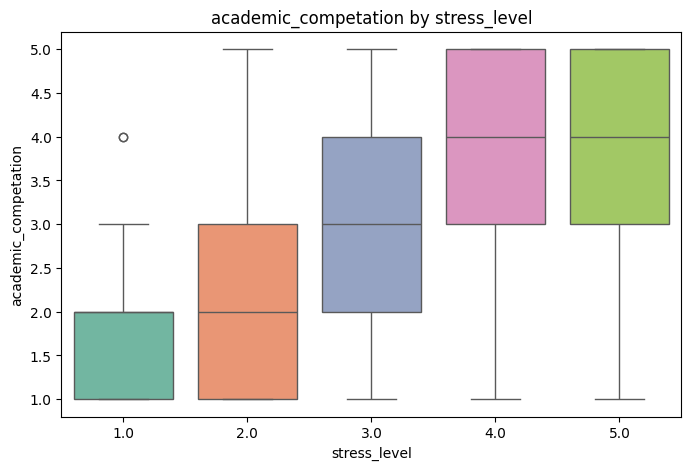

In [67]:
cat_col = 'stress_level'
numeric_cols = df.select_dtypes(include=[np.number]).columns.drop(cat_col)
for col in numeric_cols:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=cat_col, y=col, data=df, palette='Set2')
    plt.title(f'{col} by {cat_col}')
    plt.ylabel(col)
    plt.xlabel(cat_col)
    plt.show()

# Academic Stress Hypothesis Testing

In [68]:
# 1. ANOVA: Do students in different academic stages have different stress levels?
from scipy import stats
groups = [group['stress_level'].values for name, group in df.groupby('acadmic_stage')]
F_stat, p_val = stats.f_oneway(*groups)
print(f"ANOVA F-statistic: {F_stat:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Significant difference in stress levels across academic stages.")
else:
    print("Result: No significant difference.")

ANOVA F-statistic: 0.60, p-value: 0.5500
Result: No significant difference.


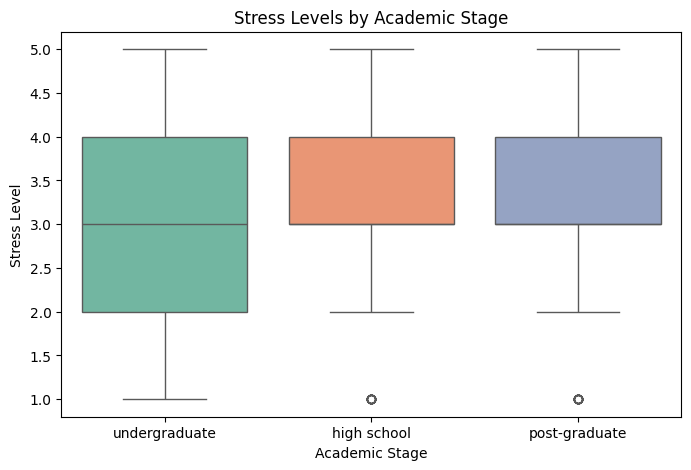

In [69]:
# Visualization of stress levels by academic stage
plt.figure(figsize=(8,5))
sns.boxplot(x='acadmic_stage', y='stress_level', data=df, palette='Set2')
plt.title('Stress Levels by Academic Stage')
plt.ylabel('Stress Level')
plt.xlabel('Academic Stage')
plt.show()

In [70]:
# 2. t-test: Is stress level different for bad habit
group_yes = df[df['bad_habbits']=='Yes']['stress_level']
group_no = df[df['bad_habbits']!='Yes']['stress_level']

# t-test
t_stat, p_val = stats.ttest_ind(group_yes, group_no, equal_var=False)
print(f"T-test t-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

if p_val < 0.05:
    print("Result: Significant difference in stress between students with and without bad habits.")
else:
    print("Result: No significant difference in stress between the groups.")

T-test t-statistic: 5.45, p-value: 0.0000
Result: Significant difference in stress between students with and without bad habits.


In [71]:
# 3. Chi-square test: Family pressure vs high stress (categorical)
# Create categorical variable for high stress (>=4)
df['high_stress'] = df['stress_level'] >= 4
contingency = pd.crosstab(df['Peer pressure'] > 3, df['high_stress'])
chi2, p_val, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-square statistic: {chi2:.2f}, p-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Significant association between high peer pressure and high stress.")
else:
    print("Result: No significant association.")

Chi-square statistic: 62.90, p-value: 0.0000
Result: Significant association between high peer pressure and high stress.


# Distribution & Normality Checks

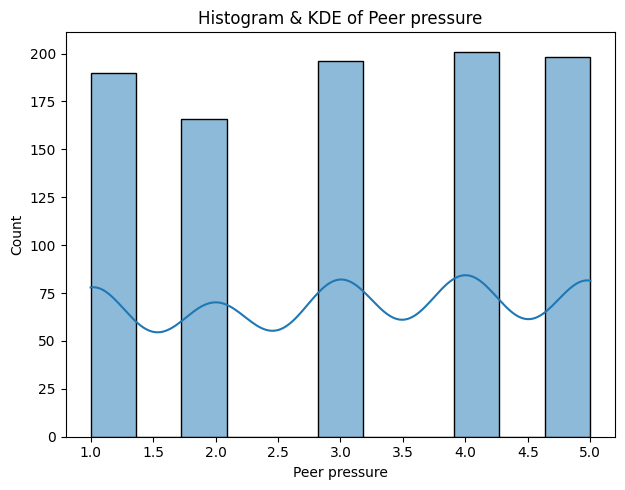

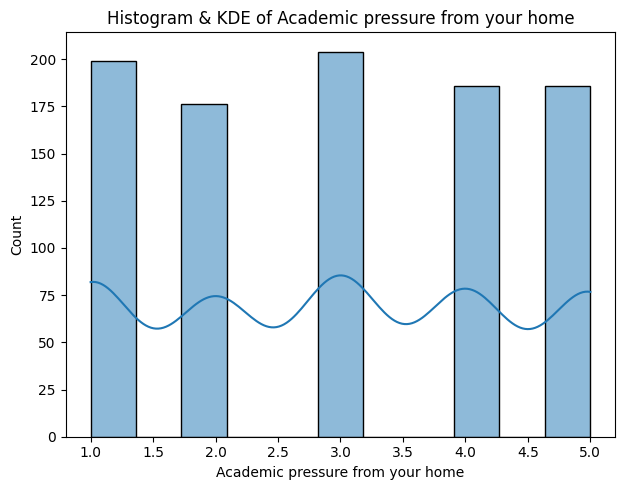

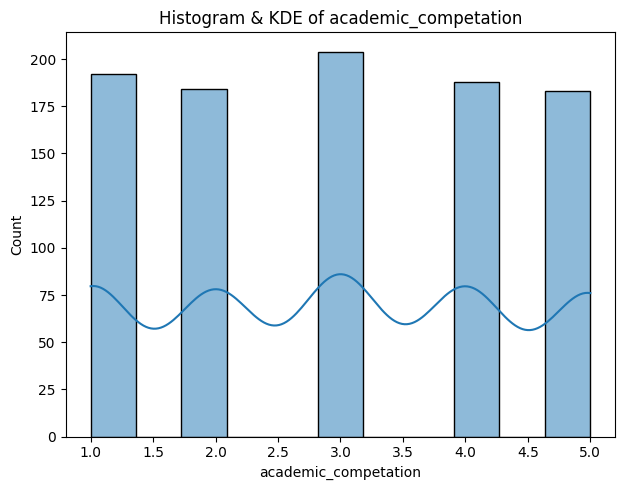


📌 Shapiro–Wilk Test Summary
                            Feature  W-Statistic  p-value       Normal?
0                     Peer pressure       0.8861      0.0  Not Normal ❌
1  Academic pressure from your home       0.8880      0.0  Not Normal ❌
2              academic_competation       0.8904      0.0  Not Normal ❌


In [108]:
# Identify numeric columns excluding the target variable
numeric_cols = df.select_dtypes(include=['number']).columns.drop('stress_level')

normality_results = []

for col in numeric_cols:
    plt.figure(figsize=(12,5))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram & KDE of {col}")
    plt.xlabel(col)       
    plt.tight_layout()
    plt.show()

    # Shapiro-Wilk Test
    stat, p = stats.shapiro(df[col].dropna())
    
    normality_results.append({
        "Feature": col,
        "W-Statistic": round(stat, 4),
        "p-value": round(p, 4),
        "Normal?": "Likely Normal ✅" if p > 0.05 else "Not Normal ❌"
    })

# Show Summary Table
normality_df = pd.DataFrame(normality_results)
print("\n📌 Shapiro–Wilk Test Summary")
print(normality_df)

# CHOOSING THE MODEL

In [90]:

from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report, make_scorer


target_col = 'stress_level'

drop_cols = ['Timestamp', 'ID']  # replace with actual columns in your dataset
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# ---- Separate features and target ----
X = df.drop(target_col, axis=1)
y = df[target_col]

# ---- Identify categorical & numerical columns ----
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# ---- Preprocessing ----
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), categorical_cols)
    ]
)

# ---- Define models ----
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, solver='lbfgs'),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC()
}



# ---- Cross-validation setup ----
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ---- Evaluate models with CV ----
print("### Initial Model Comparison with 5-fold CV ###")
for name, model in models.items():
    pipe = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', model)])
    
    acc = cross_val_score(pipe, X, y, cv=kf, scoring='accuracy')
    f1 = cross_val_score(pipe, X, y, cv=kf, scoring=make_scorer(f1_score, average='weighted'))
    
    print(f"{name}: Accuracy = {np.mean(acc):.3f}, Weighted F1-score = {np.mean(f1):.3f}")




### Initial Model Comparison with 5-fold CV ###
Logistic Regression: Accuracy = 0.906, Weighted F1-score = 0.901
Decision Tree: Accuracy = 0.665, Weighted F1-score = 0.656
Random Forest: Accuracy = 0.705, Weighted F1-score = 0.700
KNN: Accuracy = 0.660, Weighted F1-score = 0.660
SVM: Accuracy = 0.842, Weighted F1-score = 0.841


# SLICING, TRAIN, TESTING AND ANALYZING THE CLASSIFICATION

In [91]:

# # ---- Identify categorical & numerical columns ----
# categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
# ---- Logistic Regression pipeline ----
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, solver='lbfgs', C=10))
])


In [92]:
# ---- Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [93]:
# ---- Train the model ----
pipe.fit(X_train, y_train)

# ---- Predictions ----
y_train_pred = pipe.predict(X_train)
y_test_pred = pipe.predict(X_test)

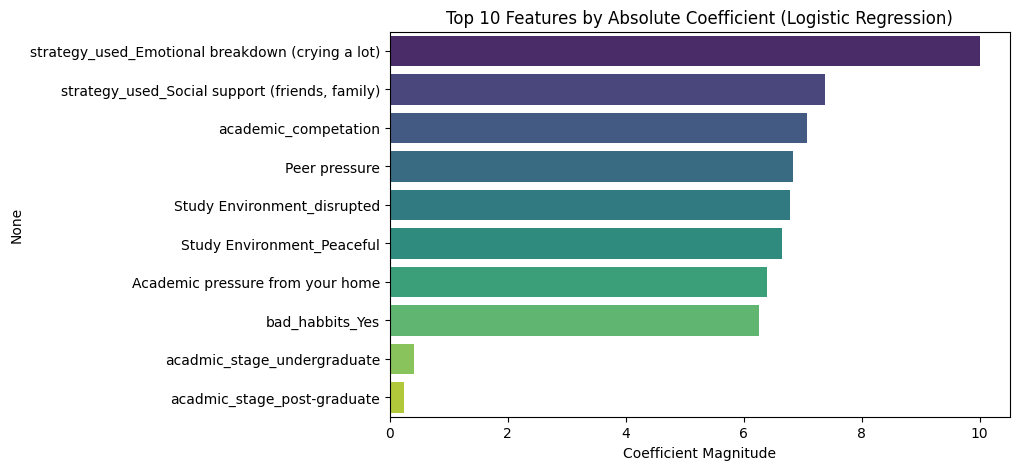

In [94]:

# -------------------------------
# Feature Importance for Logistic Regression
# -------------------------------

# Get feature names after preprocessing
num_features = numerical_cols
cat_features = pipe.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = np.concatenate([num_features, cat_features])

# Get logistic regression coefficients
logreg_coef = pipe.named_steps['classifier'].coef_[0]

# Create a series for easy sorting
coef_series = pd.Series(logreg_coef, index=feature_names)

# Take absolute value to see top influences
top_features = coef_series.abs().sort_values(ascending=False).head(10)

# ---- Plot top 10 features ----
plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index, palette="viridis")
plt.title("Top 10 Features by Absolute Coefficient (Logistic Regression)")
plt.xlabel("Coefficient Magnitude")
plt.show()

In [95]:
# ---- Accuracy & F1 Scores ----
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)
f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Train Accuracy: {train_acc:.3f}")
print(f"Test Accuracy: {test_acc:.3f}")
print(f"Test Weighted F1-score: {f1:.3f}")
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

Train Accuracy: 0.986
Test Accuracy: 0.944
Test Weighted F1-score: 0.943

Classification Report:

              precision    recall  f1-score   support

         1.0       0.90      0.64      0.75        14
         2.0       0.88      0.90      0.89        59
         3.0       0.93      0.97      0.95        80
         4.0       0.98      0.99      0.98        94
         5.0       1.00      0.95      0.97        39

    accuracy                           0.94       286
   macro avg       0.94      0.89      0.91       286
weighted avg       0.94      0.94      0.94       286



<Figure size 700x600 with 0 Axes>

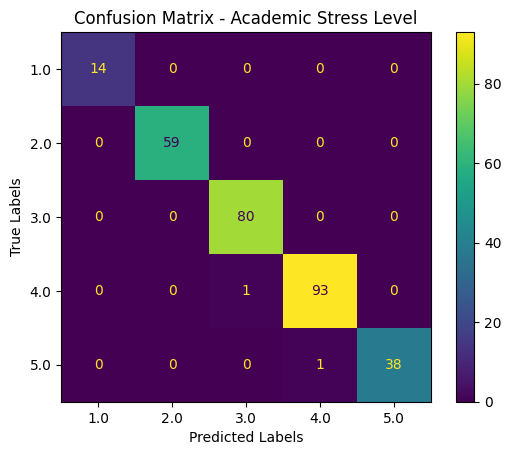

In [101]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, pipe.predict(X_test))

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipe.classes_)
plt.figure(figsize=(7, 6))
disp.plot(values_format='d')
plt.title("Confusion Matrix - Academic Stress Level")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


# PREDICTING STRESS LEVEL ACCORDING TO INPUT

In [97]:

# Train model on full dataset
pipe.fit(X, y)

# ---- Interactive input ----
def get_user_input():
    print("Enter your details (choose valid options):\n")
    
    acadmic_stage = input("Academic Stage (post-graduate/high school/undergraduate): ").strip()
    peer_pressure = int(input("Peer Pressure (1-5): "))
    home_pressure = int(input("Academic pressure from your home (1-5): "))
    study_env = input("Study Environment (disrupted/Peaceful/Noisy): ").strip()
    strategy_used = input("Coping Strategy (Analyze the situation and handle it with intellect / Social support (friends, family) / Emotional breakdown (crying a lot)): ").strip()
    bad_habbits = input("Bad Habits? (Yes/No/prefer not to say): ").strip()
    academic_competation = int(input("Academic Competition Rating (1-5): "))
    
    data = {
        'acadmic_stage': acadmic_stage,
        'Peer pressure': peer_pressure,
        'Academic pressure from your home': home_pressure,
        'Study Environment': study_env,
        'strategy_used': strategy_used,
        'bad_habbits': bad_habbits,
        'academic_competation': academic_competation
    }
    
    return pd.DataFrame([data])

# ---- Predict ----
user_df = get_user_input()
predicted_stress = pipe.predict(user_df)[0]
print(f"\nPredicted Academic Stress Level: {predicted_stress}")


Enter your details (choose valid options):



Academic Stage (post-graduate/high school/undergraduate):  undergraduate
Peer Pressure (1-5):  3
Academic pressure from your home (1-5):  3
Study Environment (disrupted/Peaceful/Noisy):  peaceful
Coping Strategy (Analyze the situation and handle it with intellect / Social support (friends, family) / Emotional breakdown (crying a lot)):  Analyze the situation and handle it with intellect
Bad Habits? (Yes/No/prefer not to say):  Yes
Academic Competition Rating (1-5):  2



Predicted Academic Stress Level: 3.0
